<a href="https://colab.research.google.com/github/ssravali/Research-1/blob/master/creating_train_and_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

#Libraries initiated
from sklearn.neighbors import KNeighborsClassifier  
import numpy as np
import pickle
from random import gauss
from random import seed
from pandas import Series
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import decomposition
import csv
import logging
from time import time
import scipy.io as sio
print("Imported libraries")

Imported libraries


In [0]:
def corr2_coeff(A,B):
    # Rowwise mean of input arrays & subtract from input arrays themeselves
    A_mA = A - A.mean(0)
    B_mB = B - B.mean(0)
    
    # Sum of squares across rows
    ssA = (A_mA**2).sum(0);
    ssB = (B_mB**2).sum(0);
    
    # Finally get corr coeff
    return (((A_mA*B_mB).sum(0)).mean(0)/(np.sqrt(ssA*ssB)).mean(0))

print("Defined function")


Defined function


In [0]:
#Data loading
for i in range(1,11):
    if i == 1:
        s = 'EMG' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        EMG = np.array(mat_contents['EMG'])
        inc = 2800 - int(EMG.shape[1])
        x_EMG = np.pad(EMG,((0,0),(0,inc),(0,0)),'constant')
        s = 'ACC' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        ACC = np.array(mat_contents['ACC'])
        x_ACC = np.pad(ACC,((0,0),(0,inc),(0,0)),'constant')
        s = 'Y' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        Y = np.array(mat_contents['Y'])
    else:
        s = 'EMG' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        EMG = np.array(mat_contents['EMG'])
        inc = 2800 - int(EMG.shape[1])
        EMG = np.pad(EMG,((0,0),(0,inc),(0,0)),'constant')
        x_EMG = np.concatenate((x_EMG,EMG),axis = 0)
        s = 'ACC' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        ACC = np.array(mat_contents['ACC'])
        ACC = np.pad(ACC,((0,0),(0,inc),(0,0)),'constant')
        x_ACC = np.concatenate((x_ACC,ACC),axis = 0)
        s = 'Y' + str(i) + '.mat'
        mat_contents = sio.loadmat(s)
        Y = np.concatenate((Y,np.array(mat_contents['Y'])),axis = 0)
x_EMG = x_EMG[:,0:800,:]
x_ACC = x_ACC[:,0:800,:]
print ('The shape of output is: ',Y.shape)
print ('The shape of input EMG is: ',x_EMG.shape)
print ('The shape of input ACC is: ',x_ACC.shape)
classes = np.unique(Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


The shape of output is:  (3120, 1)
The shape of input EMG is:  (3120, 800, 16)
The shape of input ACC is:  (3120, 800, 3)
Total number of outputs :  52
Output classes :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]
loaded data


- 1 indicates a strong positive relationship.
- 1 indicates a strong negative relationship.
- A result of zero indicates no relationship at all.

but we take mod as we dont care abt the type of relation.

In [0]:
[y_m,y_n] = Y.shape
[x1_m,x1_n,x1_ch] = x_EMG.shape
[x2_m,x2_n,x2_ch] = x_ACC.shape
x_EMG_cf = np.zeros((x1_ch,x1_ch,nClasses))
x_ACC_cf = np.zeros((x2_ch,x2_ch,nClasses))

for i in range(nClasses):
    r,r1 = np.where(Y == (i+1))#r1 is a redundent variable
    for j in range(x1_ch):
        for k in range(x1_ch):
            if(j == k):
                x_EMG_cf[j,k,i] = 1
            else:
                x_EMG_cf[j,k,i] = abs(corr2_coeff(x_EMG[r,:,j],x_EMG[r,:,k]))
    for j in range(x2_ch):
        for k in range(x2_ch):
            if(j == k):
                x_ACC_cf[j,j,i] = 1
            else:
                x_ACC_cf[j,k,i] = abs(corr2_coeff(x_ACC[r,:,j],x_ACC[r,:,k]))
print(x_EMG_cf.shape)
print(x_ACC_cf.shape)
print("Created coeff table")


(16, 16, 52)
(3, 3, 52)
Created coeff table


In [0]:
def combinations(iterable, r, nc):
    # combinations('ABCD', 2) --> AB AC AD BC BD CD
    # combinations(range(4), 3) --> 012 013 023 123
    mx = []
    tb = []
    pool = tuple(iterable)
    #print(pool)
    n = len(pool)
    #print(n)
    if r > n:
        return
    indices = list(range(r))
    #print(indices)
    #print(tuple(pool[i] for i in indices))
    tb.append(tuple(pool[i] for i in indices))
    k = tuple(pool[i] for i in indices)
    #print(k)
    #print(x_EMG_cf[k[0],k[0],nc])
    cor_mat = np.zeros((r,r))
    cor_mat[0,:] = [x_EMG_cf[k[0],k[0],nc],x_EMG_cf[k[0],k[1],nc],x_EMG_cf[k[0],k[2],nc],x_EMG_cf[k[0],k[3],nc],x_EMG_cf[k[0],k[4],nc],x_EMG_cf[k[0],k[5],nc],x_EMG_cf[k[0],k[6],nc],x_EMG_cf[k[0],k[7],nc]]
    cor_mat[1,:] = [x_EMG_cf[k[1],k[0],nc],x_EMG_cf[k[1],k[1],nc],x_EMG_cf[k[1],k[2],nc],x_EMG_cf[k[1],k[3],nc],x_EMG_cf[k[1],k[4],nc],x_EMG_cf[k[1],k[5],nc],x_EMG_cf[k[1],k[6],nc],x_EMG_cf[k[1],k[7],nc]]
    cor_mat[2,:] = [x_EMG_cf[k[2],k[0],nc],x_EMG_cf[k[2],k[1],nc],x_EMG_cf[k[2],k[2],nc],x_EMG_cf[k[2],k[3],nc],x_EMG_cf[k[2],k[4],nc],x_EMG_cf[k[2],k[5],nc],x_EMG_cf[k[2],k[6],nc],x_EMG_cf[k[2],k[7],nc]]
    cor_mat[3,:] = [x_EMG_cf[k[3],k[0],nc],x_EMG_cf[k[3],k[1],nc],x_EMG_cf[k[3],k[2],nc],x_EMG_cf[k[3],k[3],nc],x_EMG_cf[k[3],k[4],nc],x_EMG_cf[k[3],k[5],nc],x_EMG_cf[k[3],k[6],nc],x_EMG_cf[k[3],k[7],nc]]
    cor_mat[4,:] = [x_EMG_cf[k[4],k[0],nc],x_EMG_cf[k[4],k[1],nc],x_EMG_cf[k[4],k[2],nc],x_EMG_cf[k[4],k[3],nc],x_EMG_cf[k[4],k[4],nc],x_EMG_cf[k[4],k[5],nc],x_EMG_cf[k[4],k[6],nc],x_EMG_cf[k[4],k[7],nc]]
    cor_mat[5,:] = [x_EMG_cf[k[5],k[0],nc],x_EMG_cf[k[5],k[1],nc],x_EMG_cf[k[5],k[2],nc],x_EMG_cf[k[5],k[3],nc],x_EMG_cf[k[5],k[4],nc],x_EMG_cf[k[5],k[5],nc],x_EMG_cf[k[5],k[6],nc],x_EMG_cf[k[5],k[7],nc]]
    cor_mat[6,:] = [x_EMG_cf[k[6],k[0],nc],x_EMG_cf[k[6],k[1],nc],x_EMG_cf[k[6],k[2],nc],x_EMG_cf[k[6],k[3],nc],x_EMG_cf[k[6],k[4],nc],x_EMG_cf[k[6],k[5],nc],x_EMG_cf[k[6],k[6],nc],x_EMG_cf[k[6],k[7],nc]]
    cor_mat[7,:] = [x_EMG_cf[k[7],k[0],nc],x_EMG_cf[k[7],k[1],nc],x_EMG_cf[k[7],k[2],nc],x_EMG_cf[k[7],k[3],nc],x_EMG_cf[k[7],k[4],nc],x_EMG_cf[k[7],k[5],nc],x_EMG_cf[k[7],k[6],nc],x_EMG_cf[k[7],k[7],nc]]
    #print(cor_mat)
    mx.append(sum(sum(cor_mat)))
    #print(mx)
    while True:
        #print(list(reversed(range(r))))
        for i in reversed(range(r)):
            #print(i)
            #print(i + n - r)
            #print(indices[i])
            if indices[i] != i + n - r:
                #print("breaking")
                break
        else:
            #print("returning")
            x = np.argmax(mx)
            y = np.argmin(mx)
            #print("Most related:",tb[x])
            #print("Max: ", mx[x])
            k = tb[x]
            cor_mat = np.zeros((r,r))
            cor_mat[0,:] = [x_EMG_cf[k[0],k[0],nc],x_EMG_cf[k[0],k[1],nc],x_EMG_cf[k[0],k[2],nc],x_EMG_cf[k[0],k[3],nc],x_EMG_cf[k[0],k[4],nc],x_EMG_cf[k[0],k[5],nc],x_EMG_cf[k[0],k[6],nc],x_EMG_cf[k[0],k[7],nc]]
            cor_mat[1,:] = [x_EMG_cf[k[1],k[0],nc],x_EMG_cf[k[1],k[1],nc],x_EMG_cf[k[1],k[2],nc],x_EMG_cf[k[1],k[3],nc],x_EMG_cf[k[1],k[4],nc],x_EMG_cf[k[1],k[5],nc],x_EMG_cf[k[1],k[6],nc],x_EMG_cf[k[1],k[7],nc]]
            cor_mat[2,:] = [x_EMG_cf[k[2],k[0],nc],x_EMG_cf[k[2],k[1],nc],x_EMG_cf[k[2],k[2],nc],x_EMG_cf[k[2],k[3],nc],x_EMG_cf[k[2],k[4],nc],x_EMG_cf[k[2],k[5],nc],x_EMG_cf[k[2],k[6],nc],x_EMG_cf[k[2],k[7],nc]]
            cor_mat[3,:] = [x_EMG_cf[k[3],k[0],nc],x_EMG_cf[k[3],k[1],nc],x_EMG_cf[k[3],k[2],nc],x_EMG_cf[k[3],k[3],nc],x_EMG_cf[k[3],k[4],nc],x_EMG_cf[k[3],k[5],nc],x_EMG_cf[k[3],k[6],nc],x_EMG_cf[k[3],k[7],nc]]
            cor_mat[4,:] = [x_EMG_cf[k[4],k[0],nc],x_EMG_cf[k[4],k[1],nc],x_EMG_cf[k[4],k[2],nc],x_EMG_cf[k[4],k[3],nc],x_EMG_cf[k[4],k[4],nc],x_EMG_cf[k[4],k[5],nc],x_EMG_cf[k[4],k[6],nc],x_EMG_cf[k[4],k[7],nc]]
            cor_mat[5,:] = [x_EMG_cf[k[5],k[0],nc],x_EMG_cf[k[5],k[1],nc],x_EMG_cf[k[5],k[2],nc],x_EMG_cf[k[5],k[3],nc],x_EMG_cf[k[5],k[4],nc],x_EMG_cf[k[5],k[5],nc],x_EMG_cf[k[5],k[6],nc],x_EMG_cf[k[5],k[7],nc]]
            cor_mat[6,:] = [x_EMG_cf[k[6],k[0],nc],x_EMG_cf[k[6],k[1],nc],x_EMG_cf[k[6],k[2],nc],x_EMG_cf[k[6],k[3],nc],x_EMG_cf[k[6],k[4],nc],x_EMG_cf[k[6],k[5],nc],x_EMG_cf[k[6],k[6],nc],x_EMG_cf[k[6],k[7],nc]]
            cor_mat[7,:] = [x_EMG_cf[k[7],k[0],nc],x_EMG_cf[k[7],k[1],nc],x_EMG_cf[k[7],k[2],nc],x_EMG_cf[k[7],k[3],nc],x_EMG_cf[k[7],k[4],nc],x_EMG_cf[k[7],k[5],nc],x_EMG_cf[k[7],k[6],nc],x_EMG_cf[k[7],k[7],nc]]
            #print(cor_mat)
            #print("least related:",tb[y])
            #print("Min: ", mx[y])
            k = tb[y]
            cor_mat = np.zeros((r,r))
            cor_mat[0,:] = [x_EMG_cf[k[0],k[0],nc],x_EMG_cf[k[0],k[1],nc],x_EMG_cf[k[0],k[2],nc],x_EMG_cf[k[0],k[3],nc],x_EMG_cf[k[0],k[4],nc],x_EMG_cf[k[0],k[5],nc],x_EMG_cf[k[0],k[6],nc],x_EMG_cf[k[0],k[7],nc]]
            cor_mat[1,:] = [x_EMG_cf[k[1],k[0],nc],x_EMG_cf[k[1],k[1],nc],x_EMG_cf[k[1],k[2],nc],x_EMG_cf[k[1],k[3],nc],x_EMG_cf[k[1],k[4],nc],x_EMG_cf[k[1],k[5],nc],x_EMG_cf[k[1],k[6],nc],x_EMG_cf[k[1],k[7],nc]]
            cor_mat[2,:] = [x_EMG_cf[k[2],k[0],nc],x_EMG_cf[k[2],k[1],nc],x_EMG_cf[k[2],k[2],nc],x_EMG_cf[k[2],k[3],nc],x_EMG_cf[k[2],k[4],nc],x_EMG_cf[k[2],k[5],nc],x_EMG_cf[k[2],k[6],nc],x_EMG_cf[k[2],k[7],nc]]
            cor_mat[3,:] = [x_EMG_cf[k[3],k[0],nc],x_EMG_cf[k[3],k[1],nc],x_EMG_cf[k[3],k[2],nc],x_EMG_cf[k[3],k[3],nc],x_EMG_cf[k[3],k[4],nc],x_EMG_cf[k[3],k[5],nc],x_EMG_cf[k[3],k[6],nc],x_EMG_cf[k[3],k[7],nc]]
            cor_mat[4,:] = [x_EMG_cf[k[4],k[0],nc],x_EMG_cf[k[4],k[1],nc],x_EMG_cf[k[4],k[2],nc],x_EMG_cf[k[4],k[3],nc],x_EMG_cf[k[4],k[4],nc],x_EMG_cf[k[4],k[5],nc],x_EMG_cf[k[4],k[6],nc],x_EMG_cf[k[4],k[7],nc]]
            cor_mat[5,:] = [x_EMG_cf[k[5],k[0],nc],x_EMG_cf[k[5],k[1],nc],x_EMG_cf[k[5],k[2],nc],x_EMG_cf[k[5],k[3],nc],x_EMG_cf[k[5],k[4],nc],x_EMG_cf[k[5],k[5],nc],x_EMG_cf[k[5],k[6],nc],x_EMG_cf[k[5],k[7],nc]]
            cor_mat[6,:] = [x_EMG_cf[k[6],k[0],nc],x_EMG_cf[k[6],k[1],nc],x_EMG_cf[k[6],k[2],nc],x_EMG_cf[k[6],k[3],nc],x_EMG_cf[k[6],k[4],nc],x_EMG_cf[k[6],k[5],nc],x_EMG_cf[k[6],k[6],nc],x_EMG_cf[k[6],k[7],nc]]
            cor_mat[7,:] = [x_EMG_cf[k[7],k[0],nc],x_EMG_cf[k[7],k[1],nc],x_EMG_cf[k[7],k[2],nc],x_EMG_cf[k[7],k[3],nc],x_EMG_cf[k[7],k[4],nc],x_EMG_cf[k[7],k[5],nc],x_EMG_cf[k[7],k[6],nc],x_EMG_cf[k[7],k[7],nc]]
            #print(cor_mat)
            return tb[y]
        indices[i] += 1
        #print(i)
        #print(indices[i])
        #print("indices: ",indices)
        for j in range(i+1, r):
            #print("J: ",j)
            indices[j] = indices[j-1] + 1
            #print(indices[j-1])
            #print(indices[j])
        #print(tuple(pool[i] for i in indices))
        tb.append(tuple(pool[i] for i in indices))
        k = tuple(pool[i] for i in indices)
        #print(k)
        cor_mat = np.zeros((r,r))
        cor_mat[0,:] = [x_EMG_cf[k[0],k[0],nc],x_EMG_cf[k[0],k[1],nc],x_EMG_cf[k[0],k[2],nc],x_EMG_cf[k[0],k[3],nc],x_EMG_cf[k[0],k[4],nc],x_EMG_cf[k[0],k[5],nc],x_EMG_cf[k[0],k[6],nc],x_EMG_cf[k[0],k[7],nc]]
        cor_mat[1,:] = [x_EMG_cf[k[1],k[0],nc],x_EMG_cf[k[1],k[1],nc],x_EMG_cf[k[1],k[2],nc],x_EMG_cf[k[1],k[3],nc],x_EMG_cf[k[1],k[4],nc],x_EMG_cf[k[1],k[5],nc],x_EMG_cf[k[1],k[6],nc],x_EMG_cf[k[1],k[7],nc]]
        cor_mat[2,:] = [x_EMG_cf[k[2],k[0],nc],x_EMG_cf[k[2],k[1],nc],x_EMG_cf[k[2],k[2],nc],x_EMG_cf[k[2],k[3],nc],x_EMG_cf[k[2],k[4],nc],x_EMG_cf[k[2],k[5],nc],x_EMG_cf[k[2],k[6],nc],x_EMG_cf[k[2],k[7],nc]]
        cor_mat[3,:] = [x_EMG_cf[k[3],k[0],nc],x_EMG_cf[k[3],k[1],nc],x_EMG_cf[k[3],k[2],nc],x_EMG_cf[k[3],k[3],nc],x_EMG_cf[k[3],k[4],nc],x_EMG_cf[k[3],k[5],nc],x_EMG_cf[k[3],k[6],nc],x_EMG_cf[k[3],k[7],nc]]
        cor_mat[4,:] = [x_EMG_cf[k[4],k[0],nc],x_EMG_cf[k[4],k[1],nc],x_EMG_cf[k[4],k[2],nc],x_EMG_cf[k[4],k[3],nc],x_EMG_cf[k[4],k[4],nc],x_EMG_cf[k[4],k[5],nc],x_EMG_cf[k[4],k[6],nc],x_EMG_cf[k[4],k[7],nc]]
        cor_mat[5,:] = [x_EMG_cf[k[5],k[0],nc],x_EMG_cf[k[5],k[1],nc],x_EMG_cf[k[5],k[2],nc],x_EMG_cf[k[5],k[3],nc],x_EMG_cf[k[5],k[4],nc],x_EMG_cf[k[5],k[5],nc],x_EMG_cf[k[5],k[6],nc],x_EMG_cf[k[5],k[7],nc]]
        cor_mat[6,:] = [x_EMG_cf[k[6],k[0],nc],x_EMG_cf[k[6],k[1],nc],x_EMG_cf[k[6],k[2],nc],x_EMG_cf[k[6],k[3],nc],x_EMG_cf[k[6],k[4],nc],x_EMG_cf[k[6],k[5],nc],x_EMG_cf[k[6],k[6],nc],x_EMG_cf[k[6],k[7],nc]]
        cor_mat[7,:] = [x_EMG_cf[k[7],k[0],nc],x_EMG_cf[k[7],k[1],nc],x_EMG_cf[k[7],k[2],nc],x_EMG_cf[k[7],k[3],nc],x_EMG_cf[k[7],k[4],nc],x_EMG_cf[k[7],k[5],nc],x_EMG_cf[k[7],k[6],nc],x_EMG_cf[k[7],k[7],nc]]
        #print(cor_mat)
        mx.append(sum(sum(cor_mat)))
        #print(mx)

ch1 = np.zeros((nClasses,8))
for nc in range(nClasses):
    #print(nc)
    ch1[nc] = np.array(list(combinations(range(x1_ch), 8, nc)), dtype = int)
    ch1 = np.array(ch1,dtype = int)
print(ch1.shape)

(52, 8)


In [0]:
def combinations(iterable, r, nc):
    # combinations('ABCD', 2) --> AB AC AD BC BD CD
    # combinations(range(4), 3) --> 012 013 023 123
    mx = []
    tb = []
    pool = tuple(iterable)
    #print(pool)
    n = len(pool)
    #print(n)
    if r > n:
        return
    indices = list(range(r))
    #print(indices)
    #print(tuple(pool[i] for i in indices))
    tb.append(tuple(pool[i] for i in indices))
    k = tuple(pool[i] for i in indices)
    #print(k)
    #print(x_EMG_cf[k[0],k[0],nc])
    cor_mat = np.zeros((r,r))
    cor_mat[0,:] = [x_EMG_cf[k[0],k[0],nc],x_EMG_cf[k[0],k[1],nc]]
    cor_mat[1,:] = [x_EMG_cf[k[1],k[0],nc],x_EMG_cf[k[1],k[1],nc]]
    
    #print(cor_mat)
    mx.append(sum(sum(cor_mat)))
    #print(mx)
    while True:
        #print(list(reversed(range(r))))
        for i in reversed(range(r)):
            #print(i)
            #print(i + n - r)
            #print(indices[i])
            if indices[i] != i + n - r:
                #print("breaking")
                break
        else:
            #print("returning")
            x = np.argmax(mx)
            y = np.argmin(mx)
            #print("Most related:",tb[x])
            #print("Max: ", mx[x])
            k = tb[x]
            cor_mat = np.zeros((r,r))
            cor_mat[0,:] = [x_EMG_cf[k[0],k[0],nc],x_EMG_cf[k[0],k[1],nc]]
            cor_mat[1,:] = [x_EMG_cf[k[1],k[0],nc],x_EMG_cf[k[1],k[1],nc]]
            
            #print(cor_mat)
            #print("least related:",tb[y])
            #print("Min: ", mx[y])
            k = tb[y]
            cor_mat = np.zeros((r,r))
            cor_mat[0,:] = [x_EMG_cf[k[0],k[0],nc],x_EMG_cf[k[0],k[1],nc]]
            cor_mat[1,:] = [x_EMG_cf[k[1],k[0],nc],x_EMG_cf[k[1],k[1],nc]]
            
            #print(cor_mat)
            return tb[y]
        indices[i] += 1
        #print(i)
        #print(indices[i])
        #print("indices: ",indices)
        for j in range(i+1, r):
            #print("J: ",j)
            indices[j] = indices[j-1] + 1
            #print(indices[j-1])
            #print(indices[j])
        #print(tuple(pool[i] for i in indices))
        tb.append(tuple(pool[i] for i in indices))
        k = tuple(pool[i] for i in indices)
        #print(k)
        cor_mat = np.zeros((r,r))
        cor_mat[0,:] = [x_EMG_cf[k[0],k[0],nc],x_EMG_cf[k[0],k[1],nc]]
        cor_mat[1,:] = [x_EMG_cf[k[1],k[0],nc],x_EMG_cf[k[1],k[1],nc]]
        
        #print(cor_mat)
        mx.append(sum(sum(cor_mat)))
        #print(mx)

ch2 = np.zeros((nClasses,2))
for nc in range(nClasses):
    #print(nc)
    ch2[nc] = np.array(list(combinations(range(x2_ch), 2, nc)), dtype = int)
ch2 = np.array(ch2, dtype=int)
print(ch2.shape)

(52, 2)


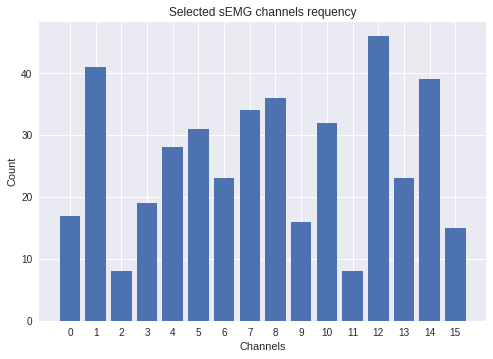

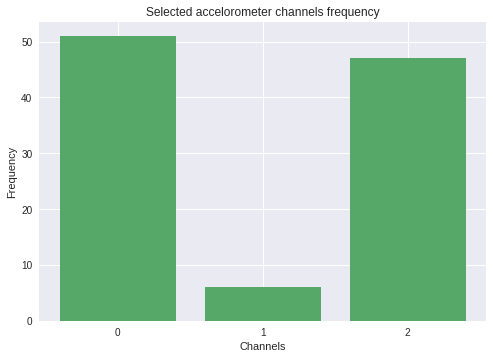

In [0]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
[uni,count] = np.unique(ch1,return_counts = 'True')
u = np.arange(uni.shape[0])
plt.bar(u, count, align='center')
plt.xticks(u, uni)
plt.title('Selected sEMG channels requency')
plt.ylabel('Count')
plt.xlabel('Channels')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
[uni,count] = np.unique(ch2,return_counts = 'True')
u = np.arange(uni.shape[0])
plt.bar(u, count, align='center')
plt.xticks(u, uni)
plt.bar(uni, count, align='center')
plt.title('Selected accelorometer channels frequency')
plt.ylabel('Frequency')
plt.xlabel('Channels')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
for i in range(nClasses):#10 exercises
    r,r1 = np.where(Y == (i+1))#r1 is a redundent variable
    if(i == 0):
        #print(ch2[i,:])
        #print(x_EMG[:,:,ch1[i,:]])
        #print(x_ACC[:,:,ch2[i,:]])
        X_data = np.concatenate((x_EMG[:,:,ch1[i,:]],x_ACC[:,:,ch2[i,:]]), axis = 2)[r]
        Y_data = np.array(Y[r])
        #print(X_data.shape)
        #print(Y_data.shape)
    else:
        #print(i)
        #print(ch1[i])
        #print(x_EMG[:,:,ch1[i,:]])
        #print(x_ACC[:,:,ch2[i,:]])
        Xdata = np.concatenate((x_EMG[:,:,ch1[i,:]],x_ACC[:,:,ch2[i,:]]), axis = 2)[r]
        X_data = np.concatenate((X_data,Xdata),axis = 0)
        Y_data = np.concatenate((Y_data,np.array(Y[r])))
print(X_data.shape)
print(Y_data.shape)
print("selected channels")

(3120, 800, 10)
(3120, 1)
selected channels


In [0]:
#formula for range of exercises
ex1 = 21
ex2 = 30
#x_data = X_data[(ex1-1)*6*10:(ex2*10*6)]
x_data = np.concatenate((X_data[11*10*6:12*10*6],X_data[15*10*6:16*10*6],X_data[17*10*6:18*10*6],X_data[23*10*6:29*10*6],X_data[41*10*6:42*10*6]), axis = 0)
#y_data = Y_data[(ex1-1)*6*10:(ex2*10*6)] - ex1
y_data = np.concatenate((Y_data[11*10*6:12*10*6],Y_data[15*10*6:16*10*6],Y_data[17*10*6:18*10*6],Y_data[23*10*6:29*10*6],Y_data[41*10*6:42*10*6]), axis = 0)
print(x_data.shape)
print(y_data.shape)

classes = np.unique(y_data)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
#print(y_data)
for i in range(classes.shape[0]):
    r = np.where(y_data == classes[i])
    y_data[r] = i

print(y_data.shape)
classes = np.unique(y_data)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

print("Selected the exercises")

(600, 800, 10)
(600, 1)
Total number of outputs :  10
Output classes :  [12 16 18 24 25 26 27 28 29 42]
(600, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Selected the exercises


In [0]:
for i in range(10):#10 exercises
    r,r1 = np.where(y_data == (i))#r1 is a redundent variable
    if(i == 0):
        tbx = x_data[r]
        train_x = tbx[0:40]
        test_x = tbx[40:60]
        tby = np.array(y_data[r])
        train_y = tby[0:40]
        test_y = tby[40:60]
    else:
        tbx = x_data[r]
        train_x = np.concatenate((train_x,tbx[0:40]),axis=0)
        test_x = np.concatenate((test_x,tbx[40:60]),axis=0)
        tby = np.array(y_data[r])
        train_y = np.concatenate((train_y,tby[0:40]))
        test_y = np.concatenate((test_y,tby[40:60]))
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
classes = np.unique(train_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
classes = np.unique(test_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)

(400, 800, 10)
(400, 1)
(200, 800, 10)
(200, 1)
Total number of outputs :  10
Total number of outputs :  10


In [0]:
for i in range(10):#10 exercises
    r,r1 = np.where(y_data == (i))#r1 is a redundent variable
    #print(r.shape)
    if(i == 0):
        tbx = x_data[r]
        train_x = tbx[0:48]
        test_x = tbx[48:60]
        tby = np.array(y_data[r])
        train_y = tby[0:48]
        test_y = tby[48:60]
    else:
        tbx = x_data[r]
        train_x = np.concatenate((train_x,tbx[0:48]),axis=0)
        test_x = np.concatenate((test_x,tbx[48:60]),axis=0)
        tby = np.array(y_data[r])
        train_y = np.concatenate((train_y,tby[0:48]))
        test_y = np.concatenate((test_y,tby[48:60]))
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
classes = np.unique(train_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
classes = np.unique(test_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)

(480, 800, 10)
(480, 1)
(120, 800, 10)
(120, 1)
Total number of outputs :  10
Total number of outputs :  10


In [0]:
sio.savemat("train.mat", dict([('data',train_x), ('data_labels',train_y)]))
sio.savemat("test.mat", dict([('data',test_x), ('data_labels',test_y)]))

In [0]:
sio.savemat("train2.mat", dict([('data',train_x), ('data_labels',train_y)]))
sio.savemat("test2.mat", dict([('data',test_x), ('data_labels',test_y)]))

In [0]:
sio.savemat("train3.mat", dict([('data',train_x), ('data_labels',train_y)]))
sio.savemat("test3.mat", dict([('data',test_x), ('data_labels',test_y)]))

Trail

In [0]:
[y_m,y_n] = Y.shape
[x1_m,x1_n,x1_ch] = x_EMG.shape
[x2_m,x2_n,x2_ch] = x_ACC.shape
x_EMG_cf = np.zeros((x1_ch,x1_ch,nClasses))
x_ACC_cf = np.zeros((x2_ch,x2_ch,nClasses))

for i in range(nClasses):
    r,r1 = np.where(Y == (i+1))#r1 is a redundent variable
    for j in range(x1_ch):
        for k in range(x1_ch):
            if(j == k):
                x_EMG_cf[j,k,i] = 0
            else:
                x_EMG_cf[j,k,i] = abs(corr2_coeff(x_EMG[r,:,j],x_EMG[r,:,k]))
    for j in range(x2_ch):
        for k in range(x2_ch):
            if(j == k):
                x_ACC_cf[j,j,i] = 0
            else:
                x_ACC_cf[j,k,i] = abs(corr2_coeff(x_ACC[r,:,j],x_ACC[r,:,k]))
print(x_EMG_cf.shape)
print(x_ACC_cf.shape)
print("Created coeff table")


(16, 16, 1)
(3, 3, 1)
Created coeff table


In [0]:
#To identify the most related ch       
nClasses = 1
Freq1 = np.zeros((nClasses,8))
Freq2 = np.zeros((nClasses,1))
for i in range(nClasses):
    I1 = []
    I2 = []
    for f in range(8):
        for j in range(x1_ch):
            mx = np.max(x_EMG_cf[j,:,i])
            for k in range(x1_ch):
                if(x_EMG_cf[j,k,i] == mx):
                    I1.append(k)
                    I2.append(mx)
        I3 = np.array([I1,I2]).T
        freq1 = np.zeros(x1_ch)
        for j in range(x1_ch):
            r_x1_ch = np.argwhere(I3[:,0] == j)
            freq1[j] = np.mean(I3[r_x1_ch,1])
        freq1[np.isnan(freq1)] = 0    
        Freq1[i,f] = np.argsort(freq1)[-1:]
        row = int(Freq1[i,f])
        print(row)
        x_EMG_cf[:,row,i] = 0
        print(x_EMG_cf[:,:,i])
    print(Freq1)
    
ch1 = np.zeros((nClasses,8))
for i in range(nClasses):
    ch_ctr = 0
    for j in range(x1_ch):
        #print("x1_ch: ",x1_ch)
        if not (np.array(np.where(Freq1[i] == j))).size:
            #print("Empty: ",np.array(np.where(Freq1[i] == j)))
            ch1[i,ch_ctr] = int(j)
            #print("ch1[i,ch_ctr]: ", ch1[i,ch_ctr])
            ch_ctr = ch_ctr + 1
            #print("ch_ctr:",ch_ctr)
        if(ch_ctr == 8):
            #print("breaking")
            break
ch1 = np.array(ch1, dtype = int)
print(ch1[0])
#print(ch2)
print("created ch array")

3
[[0.00000000e+00 4.32968130e-01 4.56775264e-01 0.00000000e+00
  1.66579431e-01 1.08708167e-01 1.12943907e-01 4.55438643e-01
  4.12403440e-03 5.43921044e-03 7.89112986e-03 6.98598093e-03
  4.08090207e-04 3.12257934e-03 1.23786782e-03 1.25074010e-02]
 [4.32968130e-01 0.00000000e+00 5.54776289e-01 0.00000000e+00
  1.20190158e-01 7.48829009e-02 6.76297978e-02 2.11042463e-01
  1.93357122e-02 4.51130205e-03 4.13757342e-02 2.38634903e-02
  2.56261191e-02 1.54260867e-02 7.94314931e-03 9.05991746e-03]
 [4.56775264e-01 5.54776289e-01 0.00000000e+00 0.00000000e+00
  2.87795108e-01 1.80229886e-01 1.34478145e-01 3.27656685e-01
  6.74780909e-03 1.87224655e-02 5.40311130e-02 3.87780981e-02
  9.39470670e-03 9.99909125e-03 1.31541462e-02 2.59756740e-02]
 [3.23942807e-01 2.53229542e-01 6.27852340e-01 0.00000000e+00
  5.02554661e-01 3.43743043e-01 1.92333797e-01 3.10707629e-01
  4.06539196e-02 7.92255594e-02 9.65460595e-02 9.31120181e-02
  1.03180364e-01 4.60622827e-02 5.50968707e-02 1.01060186e-01]
 [

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
#To identify the most related ch       
#nClasses = 2
Freq1 = np.zeros((nClasses,8))
Freq2 = np.zeros((nClasses,1))
for i in range(nClasses):
    I1 = []
    I2 = []
    for j in range(x1_ch):
        mx = np.max(x_EMG_cf[j,:,i])
        for k in range(x1_ch):
            if(x_EMG_cf[j,k,i] == mx):
                I1.append(k)
                I2.append(mx)
    I3 = np.array([I1,I2]).T
    freq1 = np.zeros(x1_ch)
    for j in range(x1_ch):
        r_x1_ch = np.argwhere(I3[:,0] == j)
        freq1[j] = np.mean(I3[r_x1_ch,1])
    freq1[np.isnan(freq1)] = 0    
    Freq1[i] = np.argsort(freq1)[-8:]
    I1 = []
    I2 = []
    for j in range(x2_ch):
        mx = np.max(x_ACC_cf[j,:,i])
        for k in range(x2_ch):
            if(x_ACC_cf[j,k,i] == mx):
                I1.append(k)
                I2.append(mx)
    I4 = np.array([I1,I2]).T
    freq2 = np.zeros(x2_ch)
    for j in range(x2_ch):
        r_x2_ch = np.argwhere(I4[:,0] == j)
        freq2[j] = np.mean(I4[r_x2_ch,1])
    freq2[np.isnan(freq2)] = 0    
    Freq2[i] = np.argsort(freq2)[-1:]
#print(Freq1)
#print(Freq2)
ch1 = np.zeros((nClasses,8))
ch2 = np.zeros((nClasses,2))
for i in range(nClasses):
    ch_ctr = 0
    for j in range(x1_ch):
        #print("x1_ch: ",x1_ch)
        if not (np.array(np.where(Freq1[i] == j))).size:
            #print("Empty: ",np.array(np.where(Freq1[i] == j)))
            ch1[i,ch_ctr] = int(j)
            #print("ch1[i,ch_ctr]: ", ch1[i,ch_ctr])
            ch_ctr = ch_ctr + 1
            #print("ch_ctr:",ch_ctr)
        if(ch_ctr == 8):
            #print("breaking")
            break
    ch_ctr = 0
    for j in range(x2_ch):
        if not (np.array(np.where(Freq2[i] == j))).size:
            ch2[i,ch_ctr] = j
            ch_ctr = ch_ctr + 1
        if(ch_ctr == 2):
            break
ch1 = np.array(ch1, dtype = int)
ch2 = np.array(ch2, dtype = int)
print(ch1[0])
#print(ch2)
ch = np.array(np.concatenate((ch1,ch2), axis = 1), dtype = int)
print(ch.shape)
print("created ch array")

[ 1  6  7 11 12 13 14 15]
(52, 10)
created ch array


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
import itertools as itr
#input
c = 8
table = np.array(list(itr.combinations(range(nClasses),c)))
mx = []
#print(table)
cor_mat = np.zeros((c,c))
for i in table:
    #print(i)
    cor_mat[0,:] = [x_EMG_cf[i[0],i[0]],x_EMG_cf[i[0],i[1]],x_EMG_cf[i[0],i[2]]]
    cor_mat[1,:] = [x_EMG_cf[i[1],i[0]],x_EMG_cf[i[1],i[1]],x_EMG_cf[i[1],i[2]]]
    cor_mat[2,:] = [x_EMG_cf[i[2],i[0]],x_EMG_cf[i[2],i[1]],x_EMG_cf[i[2],i[2]]]
    #print(cor_mat)
    #print(sum(sum(cor_mat)))
    mx.append(sum(sum(cor_mat)))
x = np.argmax(mx)
y = np.argmin(mx)
print("Most related:",table[x])
print("least related:",table[y])  

NameError: ignored